# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [2]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [3]:
av_df=pd.read_csv('cleaned_aviation_data.csv')
av_df.head()

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/3114266969.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  av_df=pd.read_csv('cleaned_aviation_data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Aboard,Serious_or_Fatal_Count,Serious_or_Fatal_Rate,is_destroyed,Make_Model
0,20001214X42095,Accident,SEA83LA036,1983-01-01,"newport, or",united states,NEWPORT MUNICIPAL,Non-Fatal,Substantial,N1296M,...,3.0,VMC,approach,Probable Cause,NaN,4.0,0.0,0.0,False,cessna 182p
1,20001214X42067,Accident,MKC83LA056,1983-01-01,"woodbine, ia",united states,MUNICIPAL,Non-Fatal,Substantial,N2639C,...,2.0,VMC,landing,Probable Cause,NaN,2.0,0.0,0.0,False,cessna 182rg
2,20001214X42063,Accident,MKC83LA050,1983-01-01,"maryville, mo",united states,RANKIN,Non-Fatal,Substantial,N58664,...,1.0,VMC,takeoff,Probable Cause,NaN,1.0,0.0,0.0,False,cessna 182p
3,20001214X42018,Accident,LAX83FUG11,1983-01-01,"upland, ca",united states,CABLE,Non-Fatal,Substantial,N3084R,...,0.0,VMC,approach,Probable Cause,NaN,2.0,0.0,0.0,False,piper pa-28r-200
4,20001214X41951,Accident,CHI83LA074,1983-01-01,"springbrook, wi",united states,SPRINGBROOK,Non-Fatal,Substantial,N89399,...,2.0,VMC,landing,Probable Cause,NaN,2.0,0.0,0.0,False,cessna 140


In [5]:
av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70556 entries, 0 to 70555
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                70556 non-null  object 
 1   Investigation.Type      70556 non-null  object 
 2   Accident.Number         70556 non-null  object 
 3   Event.Date              70556 non-null  object 
 4   Location                70508 non-null  object 
 5   Country                 70362 non-null  object 
 6   Airport.Name            41673 non-null  object 
 7   Injury.Severity         69675 non-null  object 
 8   Aircraft.damage         67860 non-null  object 
 9   Registration.Number     69402 non-null  object 
 10  Make                    70556 non-null  object 
 11  Model                   70556 non-null  object 
 12  Amateur.Built           70469 non-null  object 
 13  Number.of.Engines       64916 non-null  float64
 14  Engine.Type             63546 non-null

In [6]:
av_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Total_Aboard', 'Serious_or_Fatal_Count', 'Serious_or_Fatal_Rate',
       'is_destroyed', 'Make_Model'],
      dtype='object')

In [19]:
# Normalize and clean 'Make' values
av_df['Make'] = av_df['Make'].str.lower().str.strip()

# Merge known duplicate makes
av_df['Make'] = av_df['Make'].replace({
    'bombardier inc': 'bombardier',
    'cessna aircraft': 'cessna',
    'piper aircraft inc': 'piper',
    'beech': 'beechcraft',
})


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [20]:

# Create a new column 'Plane_Size' in the DataFrame
# If 'Total_Aboard' is 20 or fewer, classify as 'Small'
# Otherwise, classify as 'Large'
av_df['Plane_Size'] = np.where(av_df['Total_Aboard'] <= 20, 'Small', 'Large')


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [21]:
# Filter small and large planes
small_df = av_df[av_df['Plane_Size'] == 'Small']
large_df = av_df[av_df['Plane_Size'] == 'Large']

# For Small Planes
# Group by 'Make' and calculate mean injury rate and count
small_make_stats = (
    small_df.groupby('Make')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

# Keep only makes with at least 10 accident records
small_make_stats = small_make_stats[small_make_stats['num_accidents'] >= 10]

# Get top 15 safest small makes
top_small_makes = small_make_stats.nsmallest(15, 'mean_injury_rate')

# For Large Planes
# Group by 'Make' and calculate mean injury rate and count
large_make_stats = (
    large_df.groupby('Make')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

# Keep only makes with at least 10 accident records
large_make_stats = large_make_stats[large_make_stats['num_accidents'] >= 10]
# Get top 15 safest small makes
top_large_makes = large_make_stats.nsmallest(15, 'mean_injury_rate')

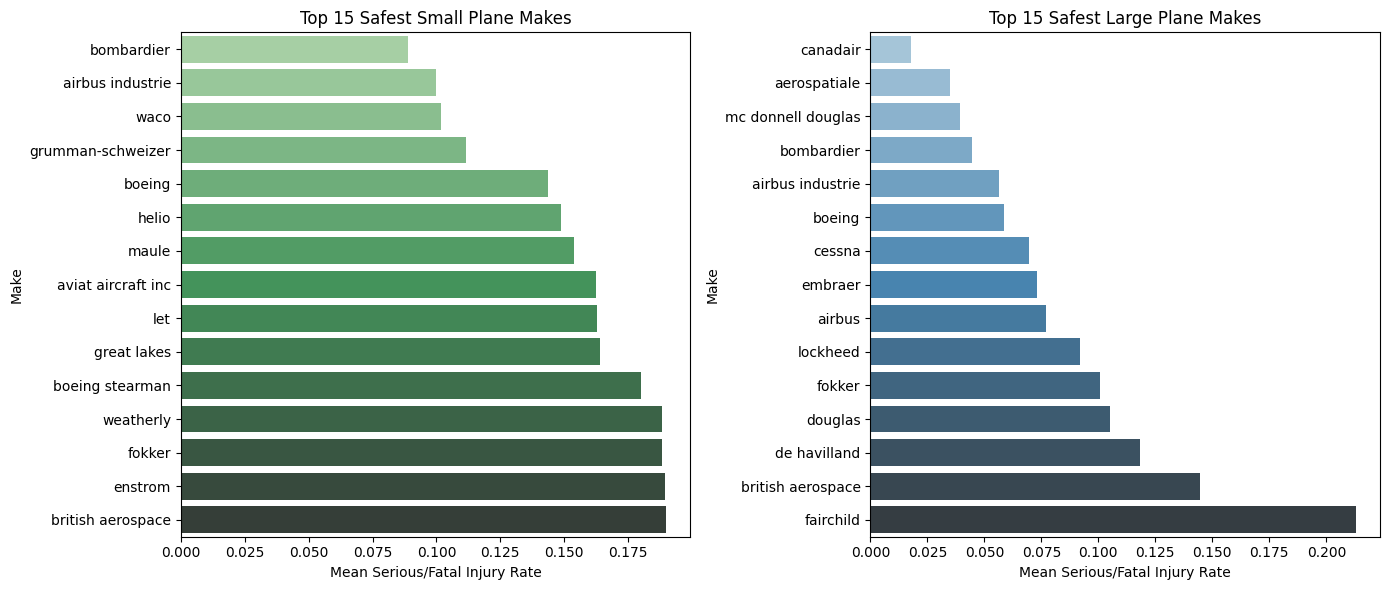

In [22]:

# Plot side-by-side 
plt.figure(figsize=(14, 6))

# Plot for small makes
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_small_makes.reset_index(),
    x='mean_injury_rate',
    y='Make',
    hue='Make',
    palette='Greens_d',
    legend=False 
)
plt.title('Top 15 Safest Small Plane Makes')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Make')

# Plot for large makes
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_large_makes.reset_index(),
    x='mean_injury_rate',
    y='Make',
    hue='Make',
    palette='Blues_d',
    legend=False
)
plt.title('Top 15 Safest Large Plane Makes')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Make')

plt.tight_layout()
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/1795066357.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


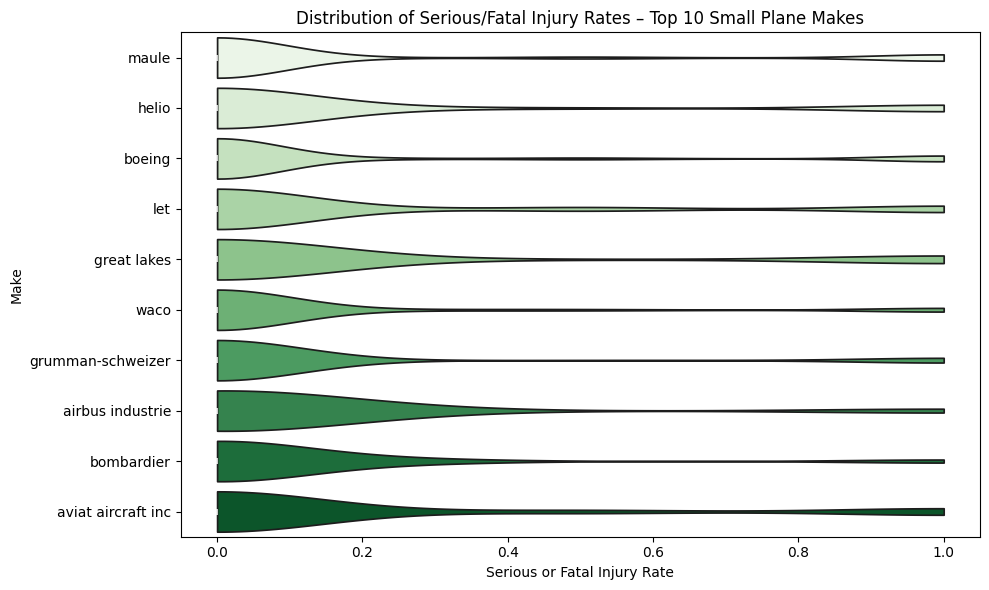

In [23]:
#Group by 'Make' and calculate average injury rate
small_make_means = (
    small_df.groupby('Make')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

# Keep makes with at least 10 records for robustness
small_make_means = small_make_means[small_make_means['num_accidents'] >= 10]

#Get the 10 makes with the lowest average injury rate
top_10_small_makes = small_make_means.nsmallest(10, 'mean_injury_rate').index.tolist()

# Filter the original small_df for only those top 10 makes
violin_data = small_df[small_df['Make'].isin(top_10_small_makes)]

# Plot the violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=violin_data,
    x='Serious_or_Fatal_Rate',
    y='Make',
    palette='Greens',
    cut=0  # avoids extending beyond actual data
)
plt.title('Distribution of Serious/Fatal Injury Rates – Top 10 Small Plane Makes')
plt.xlabel('Serious or Fatal Injury Rate')
plt.ylabel('Make')
plt.tight_layout()
plt.show()


-Most small-plane makes in the top 10 show distributions heavily concentrated near 0, suggesting low risk of serious or fatal injuries.

-Maule, Helio, and Boeing (small craft) have particularly tight, left-heavy violins — excellent safety profiles.

-Some like Bombardier Inc show wider spreads, indicating more variation in outcomes, despite being overall low-risk on average.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/3441845629.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


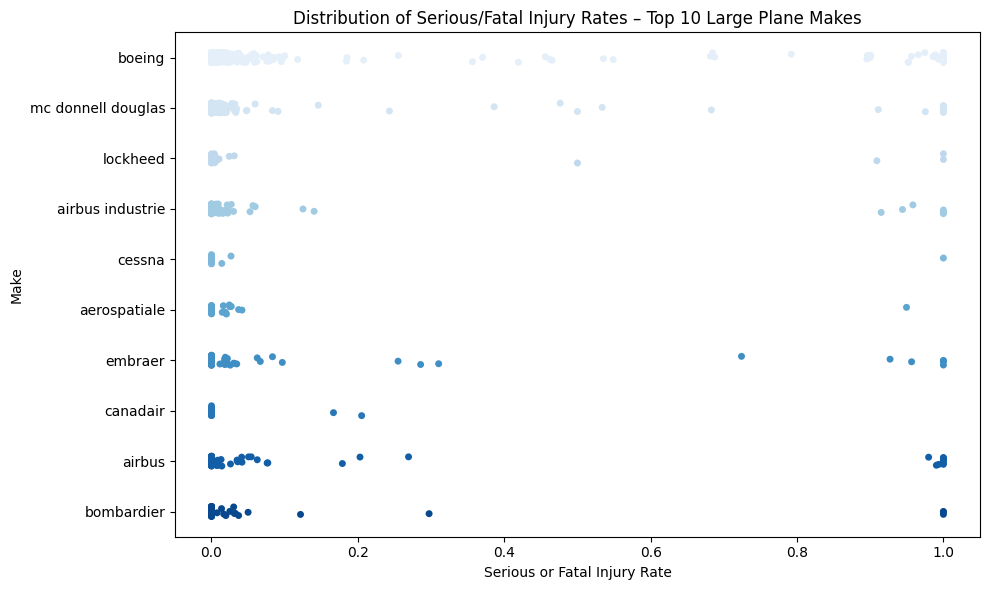

In [28]:
#Group by 'Make' and calculate average injury rate
large_make_means = (
    large_df.groupby('Make')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

# Keep makes with at least 10 records for robustness
large_make_means = large_make_means[large_make_means['num_accidents'] >= 10]

#Get the 10 makes with the lowest average injury rate
top_10_large_makes = large_make_means.nsmallest(10, 'mean_injury_rate').index.tolist()

# Filter the original large_df for only those top 10 makes
stripplot_data = large_df[large_df['Make'].isin(top_10_large_makes)]

# Plot the Stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=stripplot_data,
    x='Serious_or_Fatal_Rate',
    y='Make',
    palette='Blues',  #Different color to distinguish from small-plane plots
    jitter=True        # Helps prevent dots from overlapping
)
plt.title('Distribution of Serious/Fatal Injury Rates – Top 10 Large Plane Makes')
plt.xlabel('Serious or Fatal Injury Rate')
plt.ylabel('Make')
plt.tight_layout()
plt.show()


**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

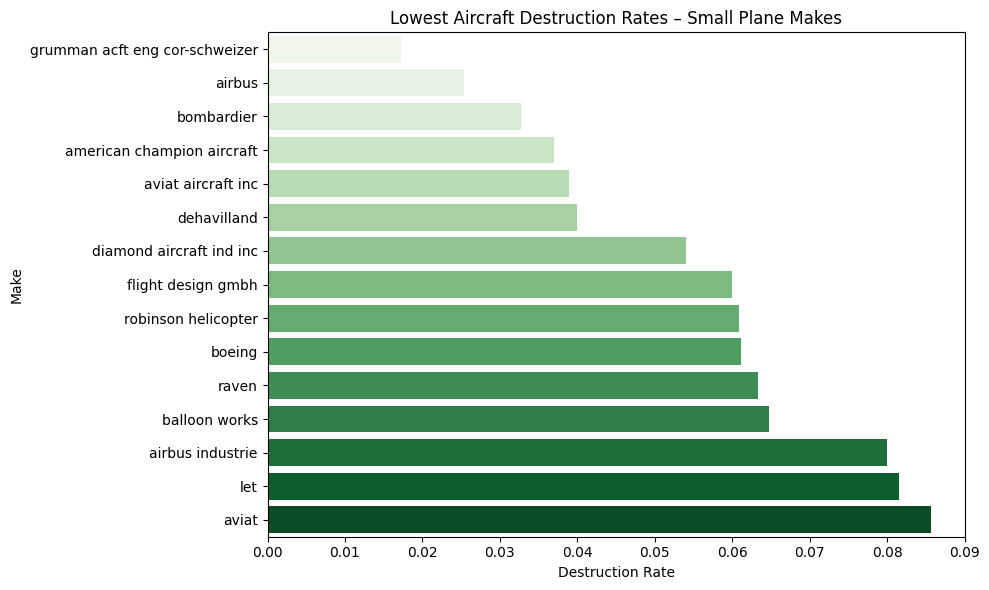

In [25]:
# Group small_df by 'Make' and calculate destruction rate
small_destruction_stats = (
    small_df.groupby('Make')['is_destroyed']
    .agg(['mean', 'count'])  # mean gives fraction destroyed; count gives sample size
    .rename(columns={'mean': 'destruction_rate', 'count': 'num_accidents'})
)

# Filter for makes with at least 10 accidents
small_destruction_stats = small_destruction_stats[small_destruction_stats['num_accidents'] >= 10]

# Get the 15 makes with the lowest destruction rates
top_15_small_destruction = small_destruction_stats.nsmallest(15, 'destruction_rate')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_15_small_destruction.reset_index(),
    x='destruction_rate',
    y='Make',
    hue='Make',
    palette='Greens'
)
plt.title('Lowest Aircraft Destruction Rates – Small Plane Makes')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')
plt.tight_layout()
plt.show()


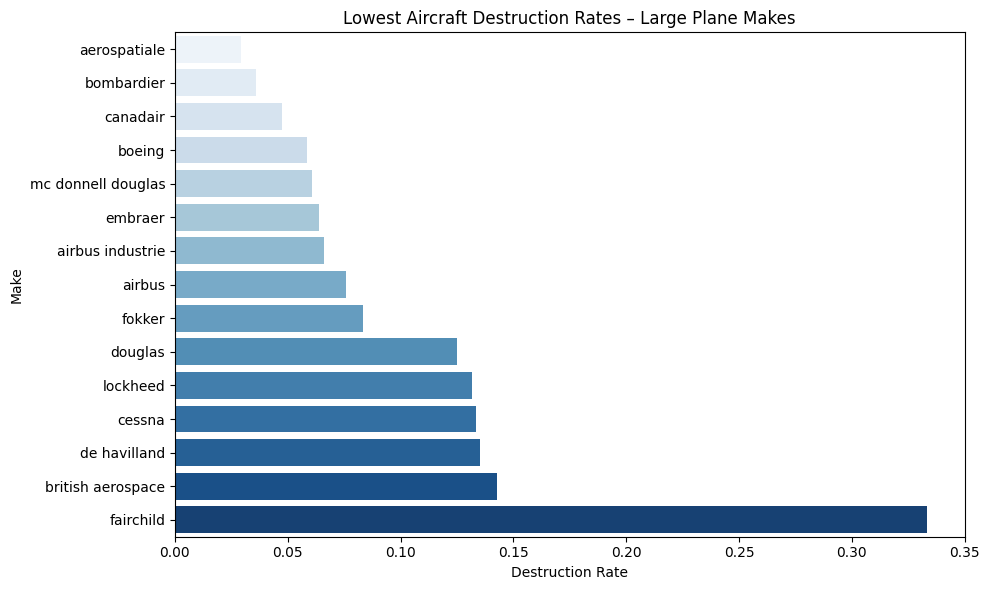

In [26]:
# Group large_df by 'Make' and calculate destruction rate
large_destruction_stats = (
    large_df.groupby('Make')['is_destroyed']
    .agg(['mean','count']) # mean gives fraction destroyed; count gives sample size
    .rename(columns={'mean': 'destruction_rate', 'count': 'num_accidents'})
)

# Filter for makes with at least 10 accidents
large_destruction_stats = large_destruction_stats[large_destruction_stats['num_accidents']>=10]

# Get the 15 makes with the lowest destruction rates
top_15_large_destruction = large_destruction_stats.nsmallest(15,'destruction_rate' )

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_15_large_destruction.reset_index(),
    x='destruction_rate',
    y='Make',
    hue='Make',
    palette='Blues'
)

plt.title('Lowest Aircraft Destruction Rates – Large Plane Makes')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Summary of Findings: Make-Level Injury and Destruction Rates

#### Recommended Aircraft Makes

**Small Aircraft:**
The safest small-plane manufacturers based on both low serious/fatal injury rates and low destruction rates were **Maule**, **Helio**, and **Boeing**. These makes had injury rate distributions tightly clustered near zero, indicating high survivability in the event of an accident. **Let**, **Waco**, and **Grumman-Schweizer** also performed well. On the other hand, **Aviat Aircraft Inc**, **Bombardier**, and **Airbus Industrie** showed wider distributions, suggesting more variation in injury outcomes and occasional severe incidents.

**Large Aircraft:**
**Bombardier**, **Canadair**, and **Airbus** had the most consistent and low serious/fatal injury rates among large aircraft, with very few high-severity accidents. **Embraer** and **Aerospatiale** also performed well, though with slightly more variation. **Boeing** and **McDonnell Douglas** were included in the top 10 by average injury rate, but their results showed a wider range and included some high-risk events.

#### Comments on the Plots

In the violin plot for small planes, most top-performing makes had serious/fatal injury rates clustered near zero. This means their accidents were typically non-severe. Makes with broader distributions like Aviat and Bombardier showed more variability and potential for higher injury rates.

The stripplot for large planes showed a similar trend. Top makes like Bombardier and Canadair had tightly packed points near zero, while makes like Boeing and Airbus showed a few higher-severity outliers.

#### Additional Notes

Only makes with at least 10 accidents were included to ensure reliable comparisons. Duplicate or inconsistent make names (like "Bombardier" and "Bombardier Inc") were merged during data cleaning to avoid splitting the data across variations of the same manufacturer.


### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/3353252108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


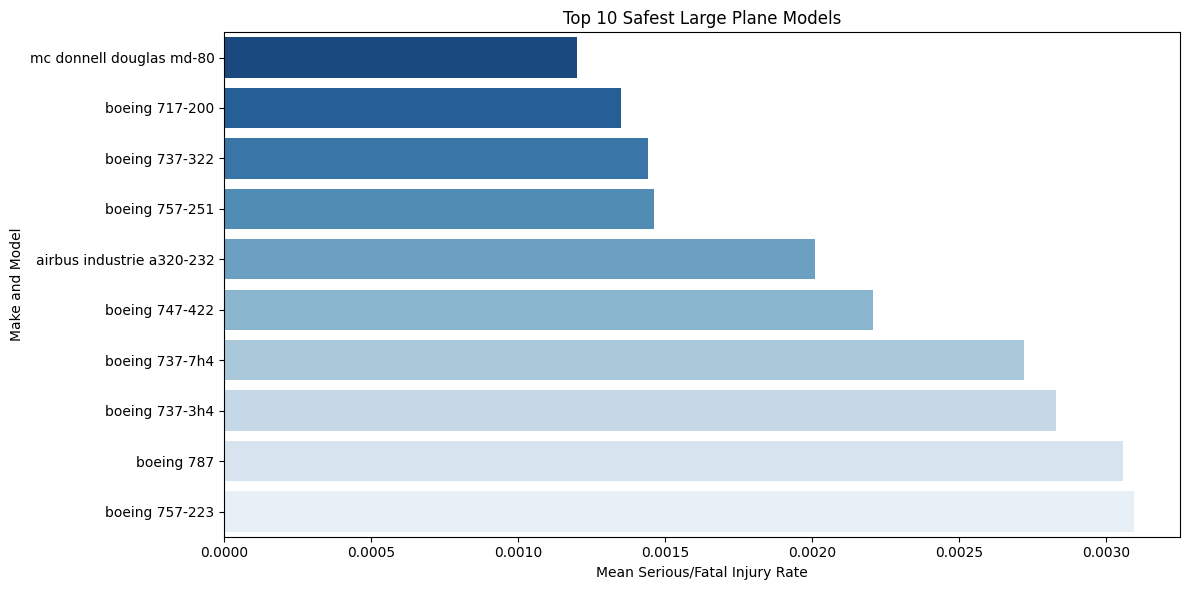

In [32]:
# Group large planes by Make_Model and calculate mean injury rate
large_model_means = (
    large_df.groupby('Make_Model')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

# Keep models with at least 10 incidents
large_model_means = large_model_means[large_model_means['num_accidents'] >= 10]

# Get the 10 models with the lowest injury rate
top_10_large_models = large_model_means.nsmallest(10, 'mean_injury_rate').reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_large_models,
    x='mean_injury_rate',
    y='Make_Model',
    palette='Blues_r'
)
plt.title('Top 10 Safest Large Plane Models')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/3491271308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


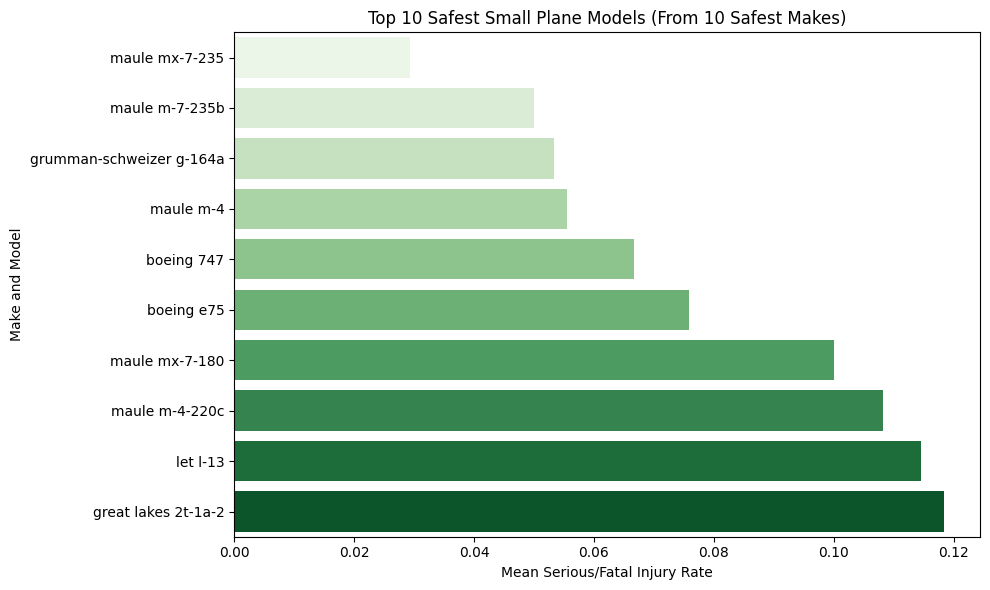

In [31]:
# Use already-filtered small_df and top_10_small_makes
# Filter only models from those 10 safest small-plane makes
top_make_models = small_df[small_df['Make'].isin(top_10_small_makes)]

# Group by Make_Model and filter for models with at least 10 records
top_model_stats = (
    top_make_models.groupby('Make_Model')['Serious_or_Fatal_Rate']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'mean_injury_rate', 'count': 'num_accidents'})
)

top_model_stats = top_model_stats[top_model_stats['num_accidents'] >= 10]

# Select top 10 safest models from these makes
top_10_models_from_safe_makes = top_model_stats.nsmallest(10, 'mean_injury_rate')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_models_from_safe_makes.reset_index(),
    x='mean_injury_rate',
    y='Make_Model',
    palette='Greens'
)
plt.title('Top 10 Safest Small Plane Models (From 10 Safest Makes)')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()


### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Summary of Small Plane Model Safety
The safest small aircraft models included several Maule variations, with the MX-7-235 and M-7-235B showing near-zero average injury rates. Boeing also appeared with models like the 747 and E75, which performed surprisingly well in the small-plane category.
All top models had less than 12% average serious/fatal injury rates, with most well under 8%.

### Summary of Large Plane Model Safety
The analysis of large plane models with at least 10 records shows that the McDonnell Douglas MD-80, Boeing 717-200, and Boeing 737-322 had the lowest average rates of serious or fatal injuries among large aircraft. These models consistently performed well in terms of passenger safety.

The overall injury rates for large planes in this group were very low, indicating strong safety performance across major manufacturers such as Boeing, Airbus, and McDonnell Douglas.

These findings support recommending these specific models as some of the safest options among large aircraft based on historical accident data.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/4175468128.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


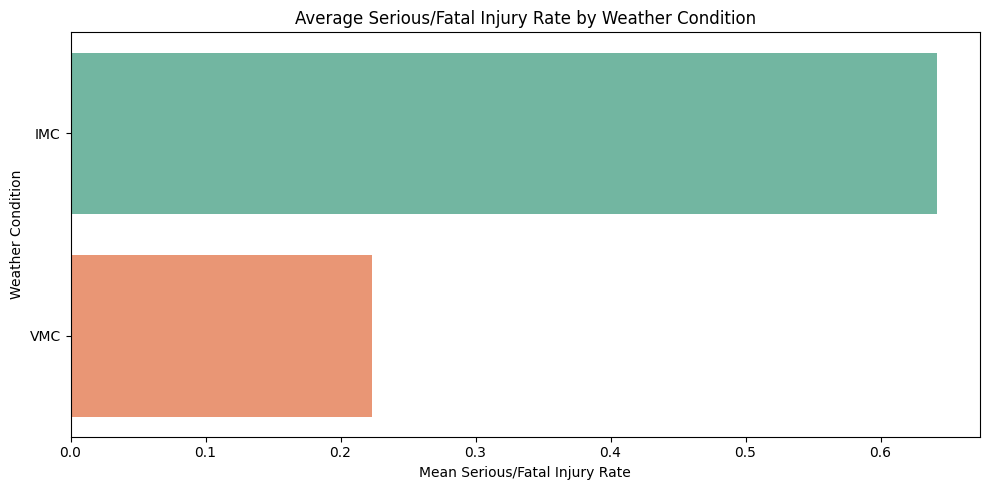

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/4175468128.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


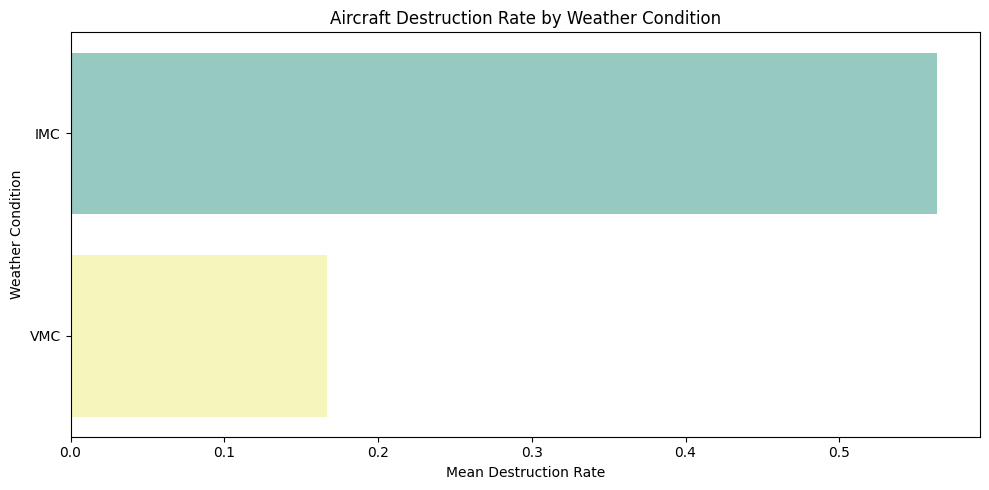

In [36]:
# Weather Condition vs. Injury Rate and Destruction Rate

# Group by Weather.Condition and calculate mean injury rate and destruction rate
weather_stats = (
    av_df.groupby('Weather.Condition')[['Serious_or_Fatal_Rate', 'is_destroyed']]
    .mean()
    .reset_index()
)

# Plot 1: Serious/Fatal Injury Rate by Weather Condition
plt.figure(figsize=(10, 5))
sns.barplot(
    data=weather_stats,
    x='Serious_or_Fatal_Rate',
    y='Weather.Condition',
    palette='Set2'
)
plt.title('Average Serious/Fatal Injury Rate by Weather Condition')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

# Plot 2: Destruction Rate by Weather Condition
plt.figure(figsize=(10, 5))
sns.barplot(
    data=weather_stats,
    x='is_destroyed',
    y='Weather.Condition',
    palette='Set3'
)
plt.title('Aircraft Destruction Rate by Weather Condition')
plt.xlabel('Mean Destruction Rate')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


### Weather Condition Analysis

We analyzed how weather conditions relate to aircraft accidents using two metrics:
the average serious/fatal injury rate and the aircraft destruction rate.

Our results show a clear pattern:

IMC (Instrument Meteorological Conditions), which involves poor visibility and more challenging flight conditions, is associated with significantly higher rates of both injuries and destruction.

VMC (Visual Meteorological Conditions), by contrast, shows much lower injury and destruction rates, highlighting the relative safety of flying in clear weather.

These findings align with expectations: adverse weather increases both the risk of injury and the likelihood of serious damage to aircraft.

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/1280689852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


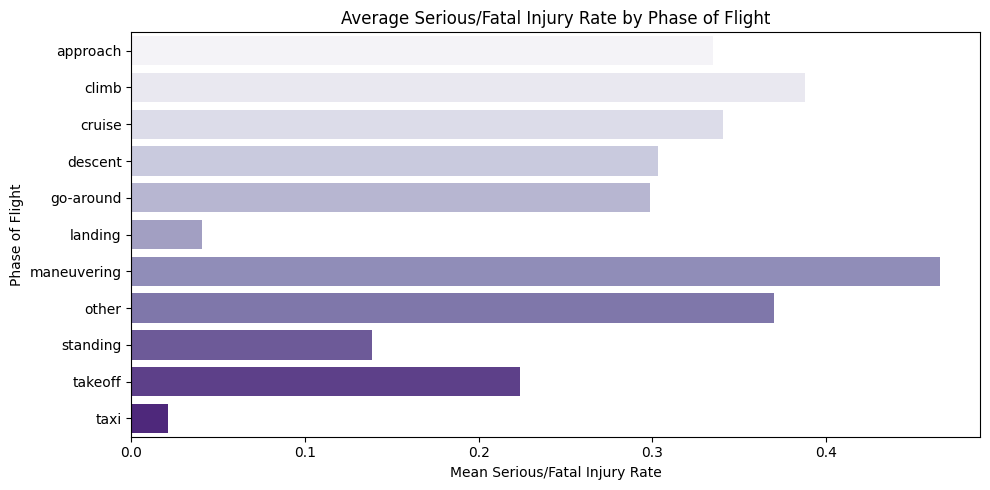

/var/folders/m9/lwcyfxd94sg7hm7bnk4fz3tr0000gn/T/ipykernel_85793/1280689852.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


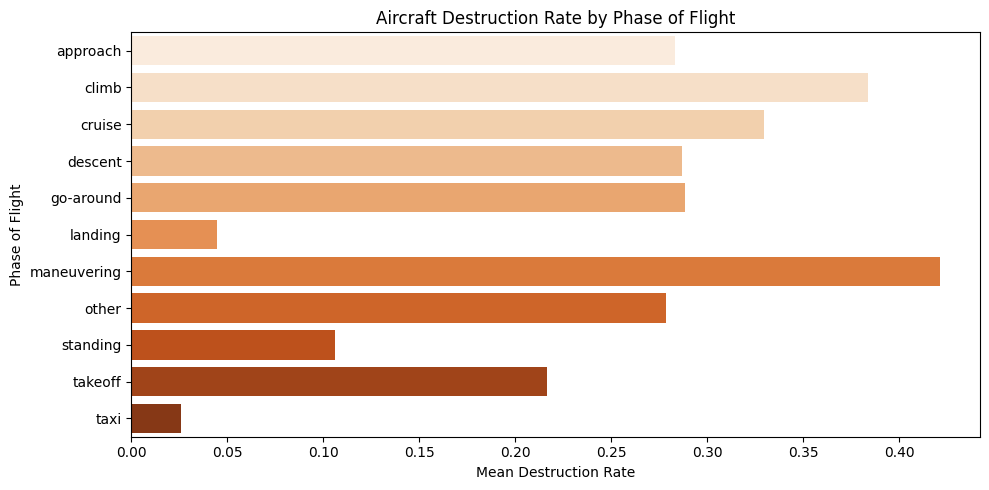

In [37]:
# Phase of Flight vs. Injury Rate and Destruction Rate

# Group by Broad.phase.of.flight and calculate mean injury and destruction rates
phase_stats = (
    av_df.groupby('Broad.phase.of.flight')[['Serious_or_Fatal_Rate', 'is_destroyed']]
    .mean()
    .reset_index()
)

# Plot 1: Serious/Fatal Injury Rate by Phase of Flight
plt.figure(figsize=(10, 5))
sns.barplot(
    data=phase_stats,
    x='Serious_or_Fatal_Rate',
    y='Broad.phase.of.flight',
    palette='Purples'
)
plt.title('Average Serious/Fatal Injury Rate by Phase of Flight')
plt.xlabel('Mean Serious/Fatal Injury Rate')
plt.ylabel('Phase of Flight')
plt.tight_layout()
plt.show()

# Plot 2: Destruction Rate by Phase of Flight
plt.figure(figsize=(10, 5))
sns.barplot(
    data=phase_stats,
    x='is_destroyed',
    y='Broad.phase.of.flight',
    palette='Oranges'
)
plt.title('Aircraft Destruction Rate by Phase of Flight')
plt.xlabel('Mean Destruction Rate')
plt.ylabel('Phase of Flight')
plt.tight_layout()
plt.show()

### Phase of Flight Analysis

This analysis explored how different phases of flight impact the likelihood of serious or fatal injuries and aircraft destruction.

The maneuvering, approach,cruise, and climb phases show the highest rates of both injuries and destruction. These phases typically involve complex control inputs and less room for error.

In contrast, phases like taxi, landing, and standing are associated with much lower injury and destruction rates, likely due to reduced speeds and proximity to the ground or gate areas.

These findings align with aviation safety knowledge: the most hazardous moments in flight tend to occur during dynamic, in-air phases rather than ground-based or stable cruise segments. This reinforces the importance of pilot training and vigilance during these critical stages.
